### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Processing

### Removing unnecessary feature

In [ ]:
data = pd.read_csv('/content/Crop_recommendation.csv')
data  = data.drop(data.columns[0], axis=1) # removing uncessary feature.

### Data Normalization

In [ ]:
from sklearn import preprocessing
# normalization is done only for features
normalized = preprocessing.normalize(data[["P","K","temperature","humidity","ph","rainfall"]])
data[["P","K","temperature","humidity","ph","rainfall"]]  = pd.DataFrame(normalized)
data.head()

,P,K,temperature,humidity,ph,rainfall,label
0,0.184185,0.188570,0.091565,0.359611,0.028518,0.889944,rice
1,0.230361,0.162841,0.086467,0.319009,0.027954,0.900218,rice
2,0.192062,0.153650,0.080332,0.287467,0.027378,0.921772,rice
3,0.133258,0.152295,0.100862,0.305193,0.026577,0.924676,rice
4,0.148799,0.148799,0.071318,0.289112,0.027026,0.930761,rice


### Dataset preview

In [ ]:
data.head()  # 1ast 5 entries of our dataset.

,P,K,temperature,humidity,ph,rainfall,label
0,0.184185,0.188570,0.091565,0.359611,0.028518,0.889944,rice
1,0.230361,0.162841,0.086467,0.319009,0.027954,0.900218,rice
2,0.192062,0.153650,0.080332,0.287467,0.027378,0.921772,rice
3,0.133258,0.152295,0.100862,0.305193,0.026577,0.924676,rice
4,0.148799,0.148799,0.071318,0.289112,0.027026,0.930761,rice


In [ ]:
data.tail()   #last 5 entries of our data set.

,P,K,temperature,humidity,ph,rainfall,label
2195,0.172260,0.162127,0.135653,0.336481,0.034351,0.900689,coffee
2196,0.102742,0.184935,0.187792,0.387928,0.041692,0.876214,coffee
2197,0.171162,0.155602,0.125165,0.348678,0.033001,0.898977,coffee
2198,0.216698,0.230241,0.177912,0.352997,0.045769,0.861207,coffee
2199,0.113080,0.188467,0.148279,0.379424,0.042592,0.885398,coffee


### Displaying data information

In [ ]:
data.info()    #print the information about our dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P            2200 non-null   float64
 1   K            2200 non-null   float64
 2   temperature  2200 non-null   float64
 3   humidity     2200 non-null   float64
 4   ph           2200 non-null   float64
 5   rainfall     2200 non-null   float64
 6   label        2200 non-null   object 
dtypes: float64(6), object(1)
memory usage: 120.4+ KB


### Displaying data shape

In [ ]:
data.shape    # we have 69,718 entries in our dataset.

(2200, 7)

### Data description

In [ ]:
data.describe()    # getting information about each column

,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,0.340537,0.276584,0.177238,0.477738,0.044803,0.630716
std,0.175416,0.188976,0.063819,0.184381,0.014959,0.208255
min,0.025996,0.032900,0.032666,0.098671,0.016708,0.176065
25%,0.181841,0.150617,0.128912,0.330852,0.033218,0.456721
50%,0.357500,0.199177,0.167611,0.484229,0.045741,0.655702
75%,0.492106,0.320624,0.230412,0.612038,0.055866,0.812662
max,0.722567,0.785463,0.373207,0.840195,0.107503,0.944612


### Displaying data columns

In [ ]:
data.columns   # we have 7 features in our dataset

Index(['P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

### Calculating total unique value

In [ ]:
data.nunique()   # printing unique count of each each feature.

,0
P,2200
K,2200
temperature,2200
humidity,2200
ph,2200
rainfall,2200
label,22


### Checking for null value in data

In [ ]:
data.isnull().sum()  # we don't have any null values

,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


### Checking duplicate values in data

In [ ]:
data.duplicated().sum() # find duplicate entries if any

np.int64(0)

In [ ]:
data['label'].unique()  # printing unique label classes 0

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
data['label'].nunique()  # printing count of unique class

22

## Relationship Analysis

In [ ]:
#Relationship analysis?

### Correlation

In [ ]:
correlation = data.drop(columns=['label']).corr()  # correlation of features with each other, excluding the label column
print(correlation)

                    P         K  temperature  humidity        ph  rainfall
P            1.000000  0.213715     0.137860 -0.261115  0.217303 -0.407368
K            0.213715  1.000000    -0.264721 -0.188453 -0.234619 -0.629062
temperature  0.137860 -0.264721     1.000000  0.576382  0.766718 -0.315826
humidity    -0.261115 -0.188453     0.576382  1.000000  0.508663 -0.453650
ph           0.217303 -0.234619     0.766718  0.508663  1.000000 -0.323108
rainfall    -0.407368 -0.629062    -0.315826 -0.453650 -0.323108  1.000000


### Plotting heatmap

<Axes: >

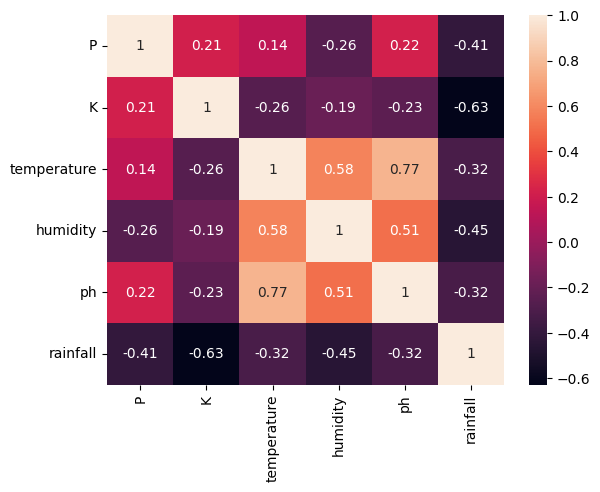

In [ ]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot = True)

### Plotting pairgrid

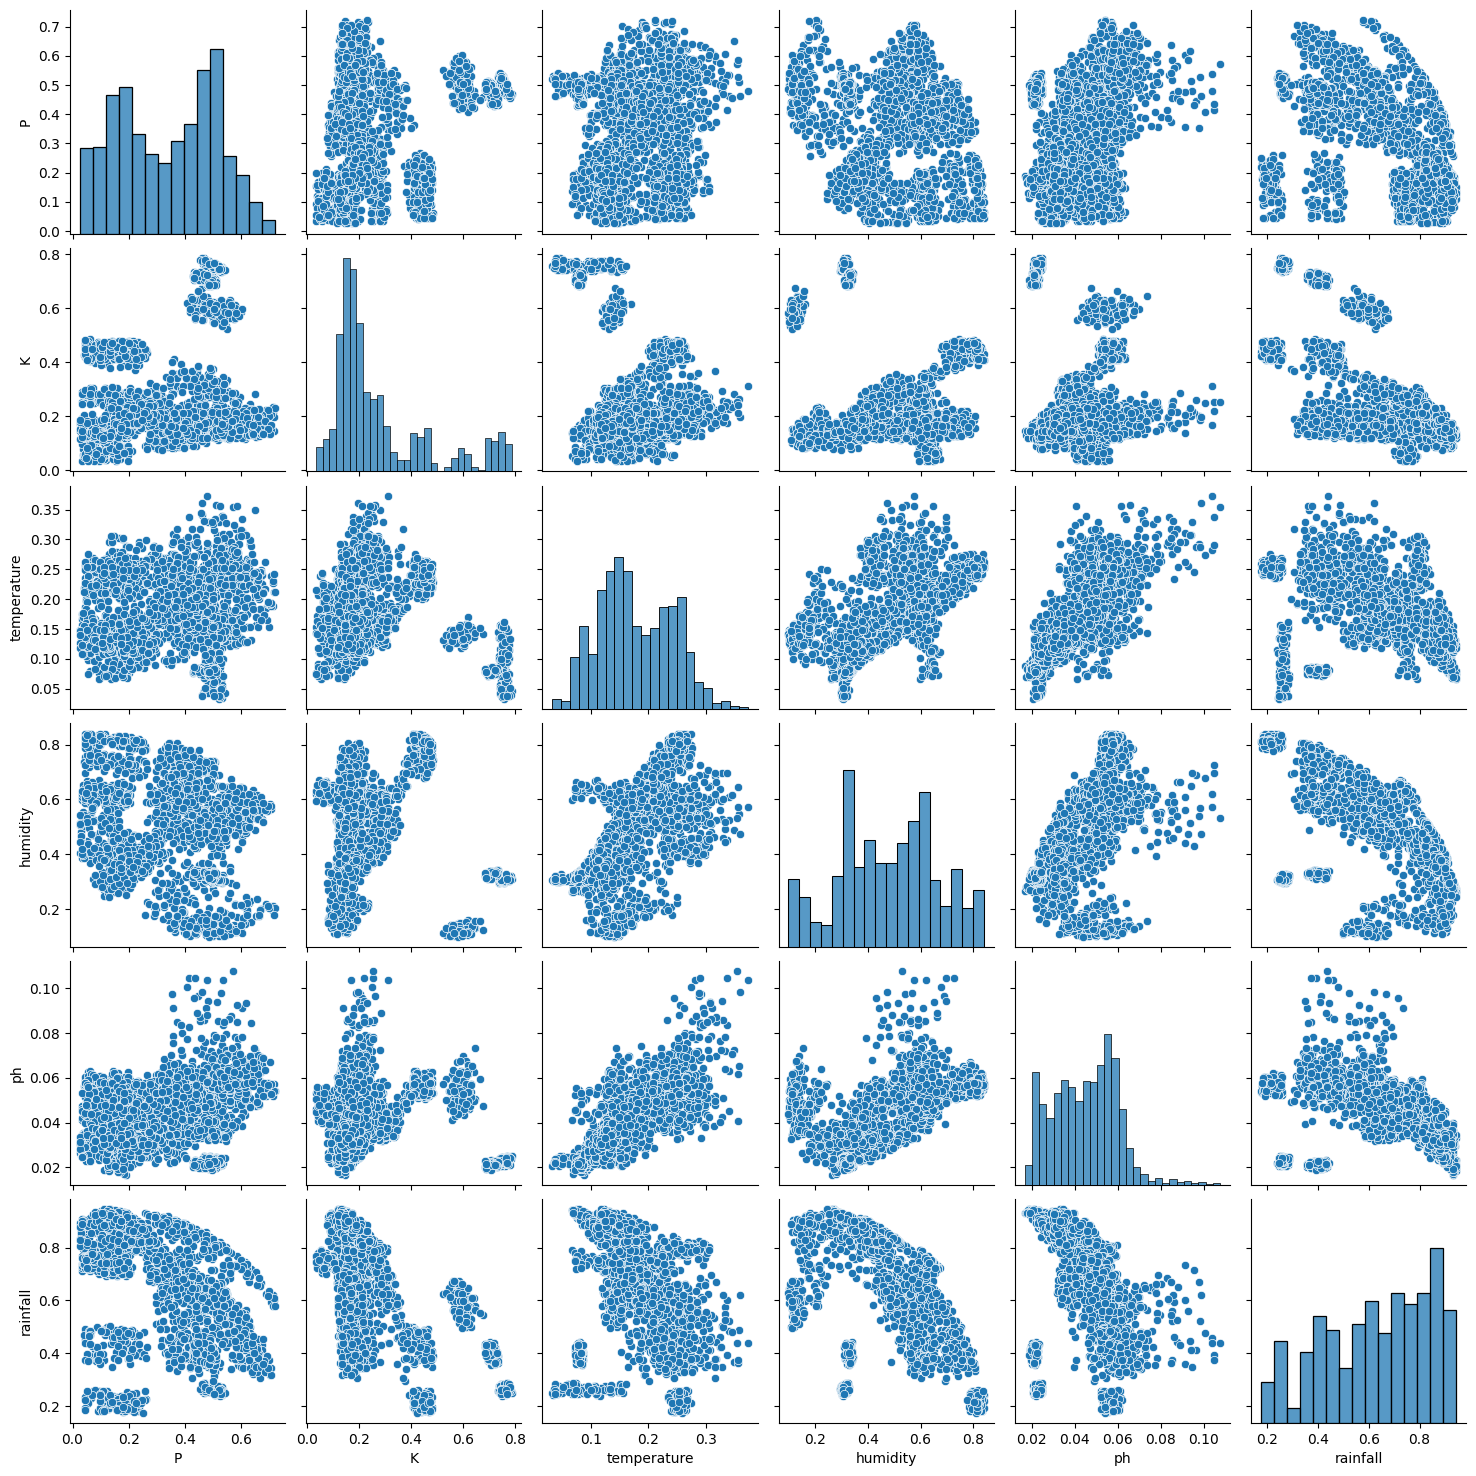

In [ ]:
sns.pairplot(data)

### Plotting Relational Plot

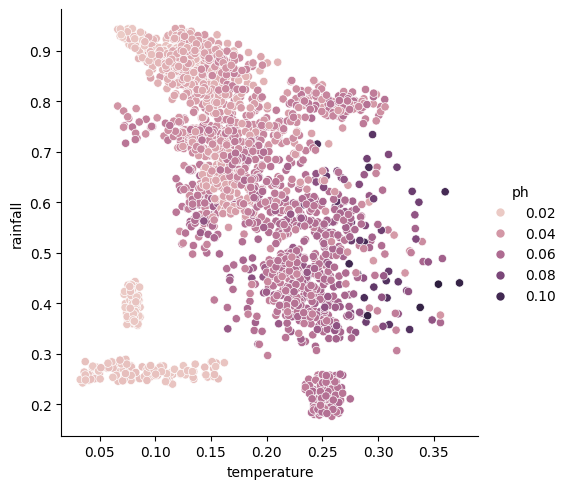

In [ ]:
sns.relplot(data=data,x='temperature', y='rainfall', hue = 'ph')

### Data distribution plot

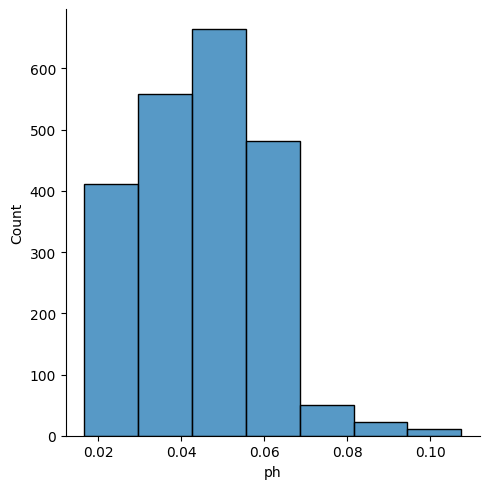

In [ ]:
sns.displot(data['ph'],bins=7)

<ipython-input-31-88eb0e686693>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ph'],bins=5)


<Axes: xlabel='ph', ylabel='Density'>

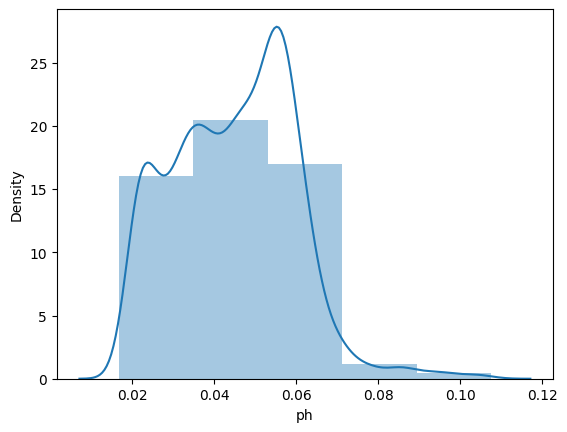

In [ ]:
sns.distplot(data['ph'],bins=5)

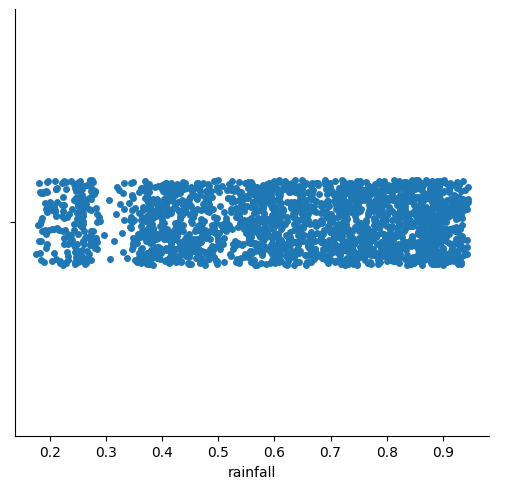

In [ ]:
sns.catplot(x='rainfall', data = data)

### Plotting histogram from each feature to check skewed features if any

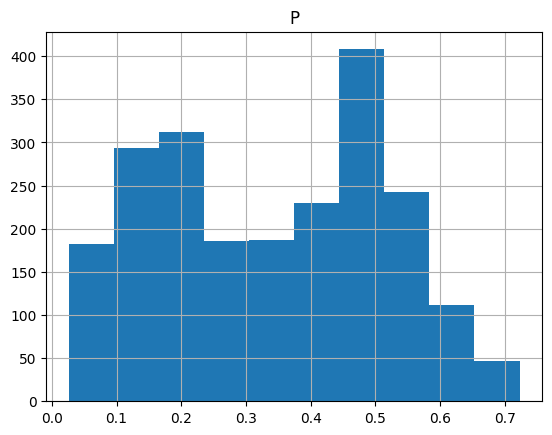

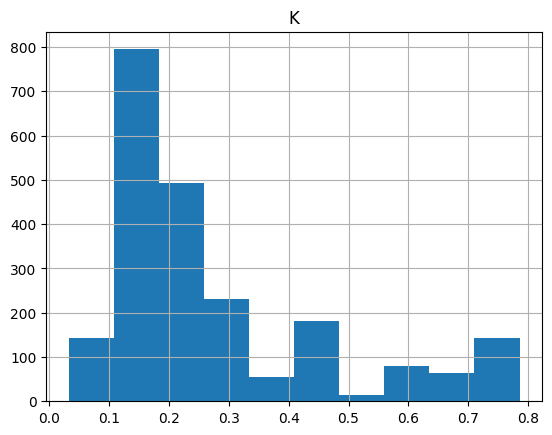

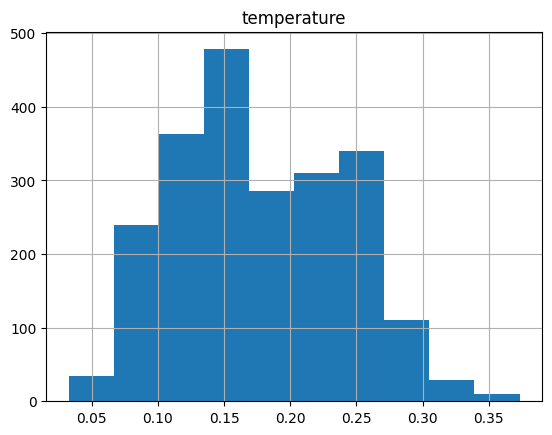

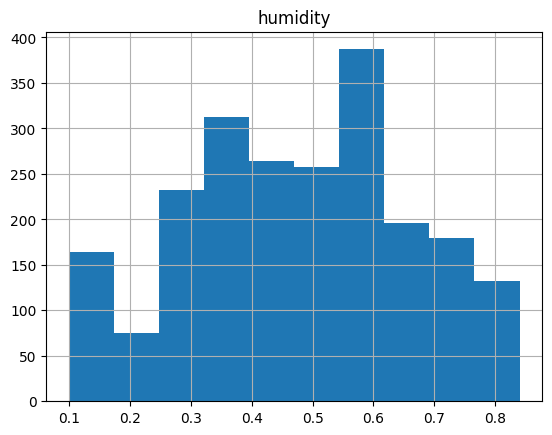

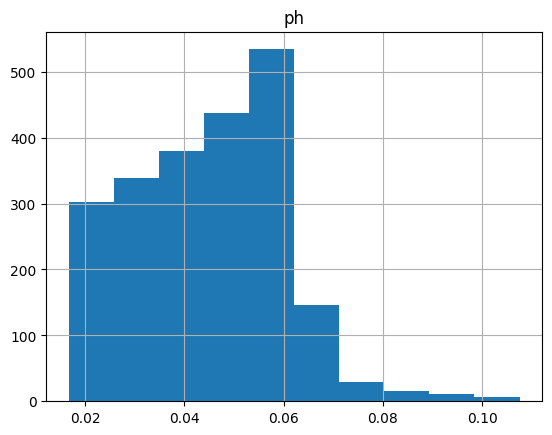

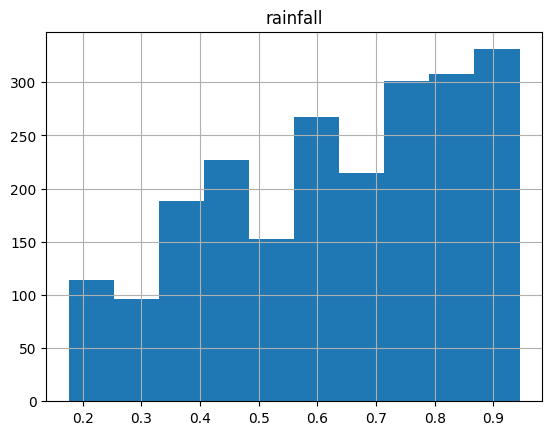

In [ ]:
feature_col = np.array(data.drop(columns=['label']).columns)
for col in feature_col:
    plt.figure()
    data[col].hist()
    plt.title(col)

## Splitting Dataset

#### Importing Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

#### Spliting datasets  in x and y

In [ ]:
# feature vector and output label
y_label = data['label']
x_features = data.drop(columns='label')

#### Splitting datasset into training and testing data

In [ ]:
# splitting training and testing dataset. 70% dataset is taken as training
#and remaining 30% dataset is taken for testing
x_train,x_test,y_train,y_test=train_test_split(x_features,y_label,test_size=0.3,random_state=0)

In [ ]:
print("feature shape",x_train.shape)
print("label shape",x_test.shape)

feature shape (1540, 6)
label shape (660, 6)


## Training Model

### Defining model vs accuracy variables

In [ ]:
model_name = []
accuracy_of_model = []

### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
# creating LogisticRegression object
logisticRegModel = LogisticRegression(solver = 'saga',random_state=0,penalty='l2',tol = 0.08,class_weight='balanced')
# training our model
logisticRegModel.fit(x_train,y_train)
# finding predicted labels of testing dataset
predicted_labels = logisticRegModel.predict(x_test)
# calculating accuracy score of our predicted labels
score = metrics.accuracy_score(y_test, predicted_labels)

print("Logistic Regression's Accuracy is: ", score*100, "%")
# printing accuracy of each classes
print(classification_report(y_test,predicted_labels))
model_name.append("Logistic Regression")
accuracy_of_model.append(score*100)

Logistic Regression's Accuracy is:  79.24242424242425 %
              precision    recall  f1-score   support

       apple       0.97      1.00      0.98        28
      banana       0.94      1.00      0.97        30
   blackgram       0.59      0.94      0.72        31
    chickpea       1.00      1.00      1.00        34
     coconut       0.80      0.92      0.86        26
      coffee       0.69      0.31      0.43        29
      cotton       0.63      0.79      0.70        28
      grapes       1.00      0.97      0.98        30
        jute       0.71      0.39      0.50        31
 kidneybeans       0.68      1.00      0.81        26
      lentil       0.81      1.00      0.90        22
       maize       1.00      0.30      0.46        27
       mango       0.76      1.00      0.86        28
   mothbeans       0.71      0.47      0.57        36
    mungbean       0.71      1.00      0.83        29
   muskmelon       0.86      1.00      0.92        30
      orange       0.94  

#### Creating Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
# printing confusion matrix for testing dataset
confusion_matrix(y_test, predicted_labels)

array([[28,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 29,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  9,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0, 15,  0],
       [ 0,  0,  0,  0,  0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  6,  0,
         0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0, 29,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  2,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, 15,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 26,  0,  0,

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# creating Decision Tree model object
decisionTreeModel = DecisionTreeClassifier(criterion="gini",random_state=0,max_depth=9)
# Training model
decisionTreeModel.fit(x_train,y_train)
# Predicting our test labels
predicted_labels = decisionTreeModel.predict(x_test)
# calculating accuracy score of our predicted labels
score = metrics.accuracy_score(y_test, predicted_labels)
print("Decision Trees's Accuracy is: ", score*100,"%")
print(classification_report(y_test,predicted_labels))
model_name.append("Decision Trees")
accuracy_of_model.append(score*100)

Decision Trees's Accuracy is:  61.212121212121204 %
              precision    recall  f1-score   support

       apple       0.97      1.00      0.98        28
      banana       0.55      1.00      0.71        30
   blackgram       0.00      0.00      0.00        31
    chickpea       0.97      0.97      0.97        34
     coconut       0.63      0.92      0.75        26
      coffee       0.00      0.00      0.00        29
      cotton       0.00      0.00      0.00        28
      grapes       1.00      1.00      1.00        30
        jute       0.28      1.00      0.43        31
 kidneybeans       0.96      0.96      0.96        26
      lentil       0.15      1.00      0.25        22
       maize       0.00      0.00      0.00        27
       mango       1.00      0.89      0.94        28
   mothbeans       0.00      0.00      0.00        36
    mungbean       0.93      0.86      0.89        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Creating confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
# creating confusion matrix of testing dataset
confusion_matrix(y_test, predicted_labels)

array([[28,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 31,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 1,  0,  0, 33,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 24,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  9,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 28,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 31,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 25,  0,  0,

### Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(x_train,y_train)
y_predict=clf.predict(x_test)
score = metrics.accuracy_score(y_test, y_predict)
print("AdaBoost Accuracy is: ", score*100,"%")
print(classification_report(y_test,y_predict))
model_name.append("AdaBoost")
accuracy_of_model.append(score*100)

AdaBoost Accuracy is:  15.606060606060607 %
              precision    recall  f1-score   support

       apple       0.00      0.00      0.00        28
      banana       0.00      0.00      0.00        30
   blackgram       0.00      0.00      0.00        31
    chickpea       0.97      1.00      0.99        34
     coconut       0.00      0.00      0.00        26
      coffee       0.00      0.00      0.00        29
      cotton       0.07      1.00      0.13        28
      grapes       0.00      0.00      0.00        30
        jute       0.00      0.00      0.00        31
 kidneybeans       0.00      0.00      0.00        26
      lentil       0.00      0.00      0.00        22
       maize       0.00      0.00      0.00        27
       mango       0.14      0.96      0.24        28
   mothbeans       0.00      0.00      0.00        36
    mungbean       0.00      0.00      0.00        29
   muskmelon       0.00      0.00      0.00        30
      orange       0.58      0.41    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
model_boost=AdaBoostClassifier(DecisionTreeClassifier(max_depth=9),n_estimators=6)
model_boost.fit(x_train.values,y_train.values)
y_predict=model_boost.predict(x_test.values)
score = metrics.accuracy_score(y_test, y_predict)
predicted_labels = model_boost.predict(x_test)
print("AdaBoost with Decision Tree(Base) Accuracy is: ", score*100,"%")
print(classification_report(y_test,predicted_labels))
model_name.append("AdaBoost with Decision Tree(Base")
accuracy_of_model.append(score*100)



AdaBoost with Decision Tree(Base) Accuracy is:  93.18181818181817 %
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.83      0.81      0.82        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      0.96      0.98        26
      coffee       0.93      0.93      0.93        29
      cotton       0.89      0.86      0.87        28
      grapes       1.00      1.00      1.00        30
        jute       0.81      0.81      0.81        31
 kidneybeans       0.87      1.00      0.93        26
      lentil       0.96      1.00      0.98        22
       maize       0.72      0.78      0.75        27
       mango       1.00      1.00      1.00        28
   mothbeans       0.88      0.78      0.82        36
    mungbean       0.97      1.00      0.98        29
   muskmelon       1.00      1.00      1.00        30
      orange 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix
# creating confusion matrix of testing dataset
confusion_matrix(y_test, predicted_labels)

array([[28,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  4,  1,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 24,  0,  0,  0,  0,  4,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 26,  0,  0,

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# creating Random Forest Model
randomForestModel = RandomForestClassifier(n_estimators=20, random_state=2,criterion = "gini",max_depth = 9)
# Training model
randomForestModel.fit(x_train,y_train)
# Predicting label of testing dataset.
predicted_labels = randomForestModel.predict(x_test)
# calcualting accuracy score of RF model
score = metrics.accuracy_score(y_test, predicted_labels)

print("Random Forest Accuracy is: ", score*100, "%")

print(classification_report(y_test,predicted_labels))

model_name.append("Random Forest")
accuracy_of_model.append(score*100)

Random Forest Accuracy is:  93.78787878787878 %
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.79      1.00      0.89        31
    chickpea       1.00      1.00      1.00        34
     coconut       0.96      1.00      0.98        26
      coffee       0.89      0.86      0.88        29
      cotton       0.78      1.00      0.88        28
      grapes       1.00      1.00      1.00        30
        jute       0.66      0.87      0.75        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      0.91      0.95        22
       maize       0.90      0.67      0.77        27
       mango       0.96      0.96      0.96        28
   mothbeans       1.00      0.81      0.89        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00

#### Creating confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
# creating confusion matrix of RF model
confusion_matrix(y_test, predicted_labels)

array([[28,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 25,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0, 27,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 26,  0,  0,

### Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
# creating object of gaussina Naive Bayes
gaussianNaiveBayesModel = GaussianNB(var_smoothing=0.09)
# training our model
gaussianNaiveBayesModel.fit(x_train,y_train)
# predicting labels of testing set
predicted_labels = gaussianNaiveBayesModel.predict(x_test)
# calculating score of our testing set
score = metrics.accuracy_score(y_test, predicted_labels)

print("Naive Bayes's Accuracy is: ", score*100, "%")

print(classification_report(y_test,predicted_labels))

model_name.append("Naive Bayes")
accuracy_of_model.append(score*100)

Naive Bayes's Accuracy is:  82.87878787878788 %
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       0.83      1.00      0.91        30
   blackgram       0.62      1.00      0.77        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      0.41      0.59        29
      cotton       0.68      1.00      0.81        28
      grapes       1.00      1.00      1.00        30
        jute       0.54      0.97      0.69        31
 kidneybeans       0.86      0.92      0.89        26
      lentil       0.88      0.95      0.91        22
       maize       0.55      0.41      0.47        27
       mango       0.85      1.00      0.92        28
   mothbeans       0.62      0.22      0.33        36
    mungbean       0.83      1.00      0.91        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00

#### Creating Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
# creating confusion matrix of our testing set
confusion_matrix(y_test, predicted_labels)

array([[28,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 12,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 24,  0,  0,

In [ ]:
from sklearn.neural_network import MLPClassifier
# creating an object of MLP Classifier , tol = 0.001 not max iter
mlpClassifier = MLPClassifier(hidden_layer_sizes = 200,activation='relu',batch_size=5000,random_state=0,tol=0.0005,max_iter = 500)
# training our model
mlpClassifier.fit(x_train,y_train)
# predicting labels of testing set
predicted_labels = mlpClassifier.predict(x_test)
# accuaray of our model on testing set
score = metrics.accuracy_score(y_test, predicted_labels)

print("Neural Network Accuracy is: ", score*100, "%")

print(classification_report(y_test,predicted_labels))

model_name.append("Neural Network")
accuracy_of_model.append(score*100)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


Neural Network Accuracy is:  89.24242424242425 %
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       0.91      1.00      0.95        30
   blackgram       0.73      0.87      0.79        31
    chickpea       1.00      1.00      1.00        34
     coconut       0.93      1.00      0.96        26
      coffee       0.83      0.83      0.83        29
      cotton       0.79      0.93      0.85        28
      grapes       1.00      1.00      1.00        30
        jute       0.64      0.94      0.76        31
 kidneybeans       0.87      1.00      0.93        26
      lentil       0.88      0.95      0.91        22
       maize       0.79      0.56      0.65        27
       mango       0.90      1.00      0.95        28
   mothbeans       0.71      0.67      0.69        36
    mungbean       0.97      1.00      0.98        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.0

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix
# creating confusion matrix of our testing set
confusion_matrix(y_test, predicted_labels)

array([[28,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2, 24,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 26,  0,  0,  0,  0,  2,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 26,  0,  0,

In [ ]:
from sklearn.svm import SVC
svmClassifier = SVC(kernel='poly',degree=2,tol = 0.001,random_state=0)
# training our model
svmClassifier.fit(x_train,y_train)
# predicting labels of testing set
predicted_labels = svmClassifier.predict(x_test)
# accuaray of our model on testing set
score = metrics.accuracy_score(y_test, predicted_labels)

print("SVM accuray is: ", score*100, "%")

print(classification_report(y_test,predicted_labels))

model_name.append("SVM")
accuracy_of_model.append(score*100)

SVM accuray is:  91.81818181818183 %
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.76      0.94      0.84        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       0.84      0.90      0.87        29
      cotton       0.79      0.96      0.87        28
      grapes       1.00      1.00      1.00        30
        jute       0.60      1.00      0.75        31
 kidneybeans       0.93      1.00      0.96        26
      lentil       0.88      1.00      0.94        22
       maize       0.86      0.70      0.78        27
       mango       0.97      1.00      0.98        28
   mothbeans       0.92      0.64      0.75        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00 

In [ ]:
from sklearn.metrics import confusion_matrix
# creating confusion matrix of our testing set
confusion_matrix(y_test, predicted_labels)

array([[28,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 29,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 26,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 27,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 31,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 26,  0,  0,

['Logistic Regression', 'Decision Trees', 'AdaBoost', 'AdaBoost with Decision Tree(Base', 'Random Forest', 'Naive Bayes', 'Neural Network', 'SVM']
[79.24242424242425, 61.212121212121204, 15.606060606060607, 93.18181818181817, 93.78787878787878, 82.87878787878788, 89.24242424242425, 91.81818181818183]


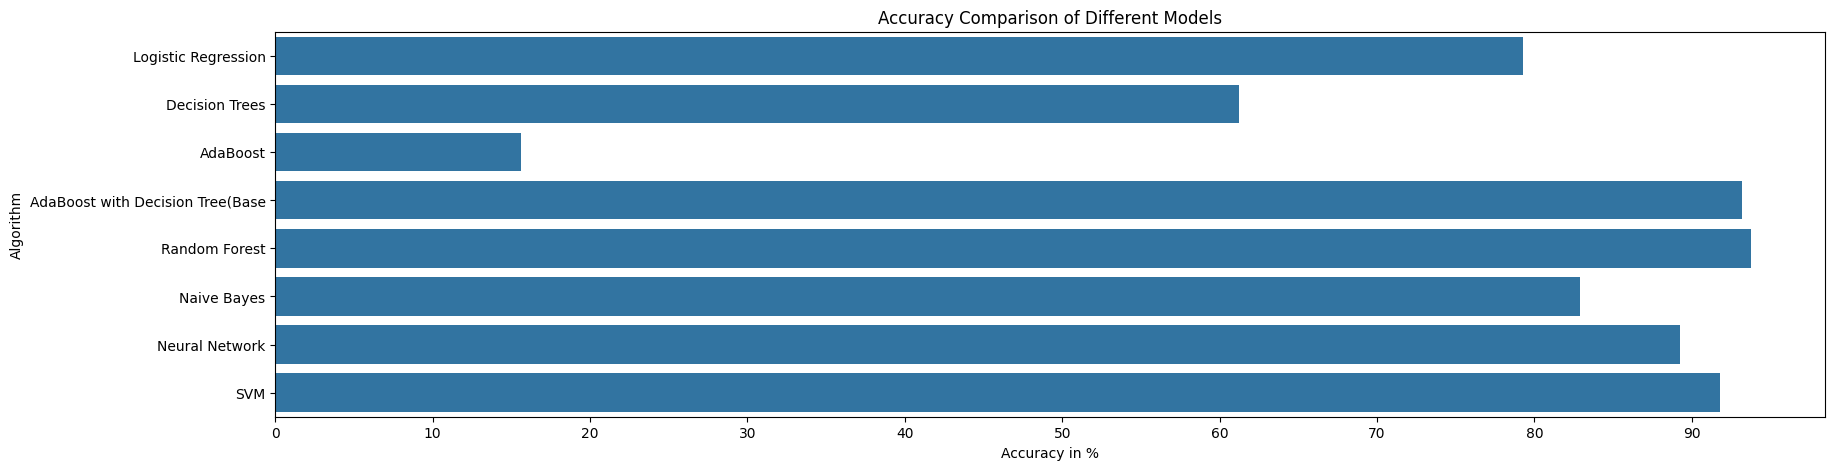

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20, 5))
# plotting accuracy of different model in same graph
plt.title('Accuracy Comparison of Different Models')
plt.ylabel('Algorithm')
plt.xlabel('Accuracy in %')
plt.xticks(range(0,101,10))
sns.barplot(y = model_name,x = accuracy_of_model)
print(model_name)
print(accuracy_of_model)

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(100,100))  # updating figure size
tree.plot_tree(decisionTreeModel, filled=True)  # plotting DT
print()